<a href="https://colab.research.google.com/github/XenoicZ/starter-academic/blob/master/Phys_328_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS 1.1#

1.

In [68]:
Mechanics = ['Phys 114', 'Phys 121', 'Phys 141']
EM = ['Phys 122', 'Phys 142']
Wave = ['Phys 123', 'Phys 143']

Diff_eq = ['Math 207', 'Math 307', 'AMath351']
Linalg = ['Math 208', 'Math 308', 'AMath352']

Math_phys = ['Phys 227']

Honor_math = ['Math 134 + 135 + 136']

# First find the math part
Math_part = []
for diff_eq in Diff_eq:
  for linalg in Linalg:
    Math_part.append(diff_eq + ' + ' + linalg)
Math_part.append(Math_phys[0])
Math_part.append(Honor_math[0])

# Then find all prerequisites
All = []
for mechanics in Mechanics:
  for em in EM:
    for wave in Wave:
      for math_part in Math_part:
        All.append(mechanics + ' + ' + em + ' + ' + wave + ' + ' + math_part)
All

['Phys 114 + Phys 122 + Phys 123 + Math 207 + Math 208',
 'Phys 114 + Phys 122 + Phys 123 + Math 207 + Math 308',
 'Phys 114 + Phys 122 + Phys 123 + Math 207 + AMath352',
 'Phys 114 + Phys 122 + Phys 123 + Math 307 + Math 208',
 'Phys 114 + Phys 122 + Phys 123 + Math 307 + Math 308',
 'Phys 114 + Phys 122 + Phys 123 + Math 307 + AMath352',
 'Phys 114 + Phys 122 + Phys 123 + AMath351 + Math 208',
 'Phys 114 + Phys 122 + Phys 123 + AMath351 + Math 308',
 'Phys 114 + Phys 122 + Phys 123 + AMath351 + AMath352',
 'Phys 114 + Phys 122 + Phys 123 + Phys 227',
 'Phys 114 + Phys 122 + Phys 123 + Math 134 + 135 + 136',
 'Phys 114 + Phys 122 + Phys 143 + Math 207 + Math 208',
 'Phys 114 + Phys 122 + Phys 143 + Math 207 + Math 308',
 'Phys 114 + Phys 122 + Phys 143 + Math 207 + AMath352',
 'Phys 114 + Phys 122 + Phys 143 + Math 307 + Math 208',
 'Phys 114 + Phys 122 + Phys 143 + Math 307 + Math 308',
 'Phys 114 + Phys 122 + Phys 143 + Math 307 + AMath352',
 'Phys 114 + Phys 122 + Phys 143 + AMath3

2.

In [69]:
multiplicity = len(All)
print('The total multiplicity is: ' + str(multiplicity))

The total multiplicity is: 132


3.

In [70]:
count = 0
for pathway in All:
  if 'Phys 227' in pathway:
    count = count + 1
print('The probability that a student used Phys 227 to meet the math requirement is: ' + str(count / multiplicity))

The probability that a student used Phys 227 to meet the math requirement is: 0.09090909090909091


#PS 1.3#

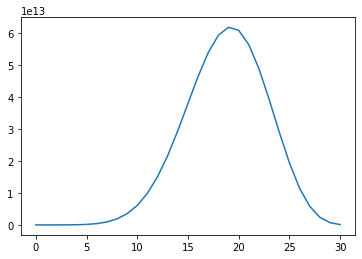

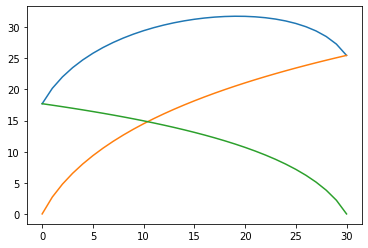

In [57]:
import scipy.special
OmegaA = []
OmegaB = []
Na = 15
Nb = 9
for q in range(0, 31):
  OmegaA.append(scipy.special.factorial(q+Na-1) / scipy.special.factorial(q) / scipy.special.factorial(Na-1))
for q in range(30, -1, -1):
  OmegaB.append(scipy.special.factorial(q+Nb-1) / scipy.special.factorial(q) / scipy.special.factorial(Nb-1))
Omega = np.array(OmegaA)*np.array(OmegaB)
plt.figure()
plt.plot(Omega)
plt.figure()

logOmega = np.log(Omega)
logOmegaA = np.log(OmegaA)
logOmegaB = np.log(OmegaB)
plt.plot(logOmega)
plt.plot(logOmegaA)
plt.plot(logOmegaB)

In [70]:
print('The max probability is when qA = ' + str(np.argmax(Omega)))
print('Which has a probality of ' + str(max(Omega) / np.sum(Omega)))

The max probability is when qA = 19
Which has a probality of 0.09927304312559183


In [60]:
logOmega = np.log(Omega)
dlogOmega_dq = (logOmegaA[20] - logOmegaA[18]) / 2
temperature = 1/dlogOmega_dq 
print('so the temperature in eps/k is ' + str(temperature))

so the temperature in eps/k is 1.84723917016474


#PS 1.4#

In [21]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

def take_walk(M, N, P):
  result = []
  for trail in range(M):
    x = 0
    for step in range(N):
      if P > random.uniform():
        x = x + 1
      else:
        x = x - 1
    result.append(x)
  result = np.array(result)
  print('Mean of M=' + str(M) + ', N=' + str(N) + ': ' + str(np.mean(result)))
  print('Std of M=' + str(M) + ', N=' + str(N) + ': ' + str(np.std(result)))
  bins = np.arange(min(result), max(result))
  plt.figure()
  plt.hist(result, bins=bins)
  plt.title("Distance for N="  + str(N) + ", M=" + str(M))
  plt.xlabel("Distance from origin")
  plt.ylabel("Counts")

  plt.figure()
  rms_result = np.sqrt(result**2)
  print('Mean of RMS: ' + str(np.mean(rms_result)))
  print('Std of RMS: ' + str(np.std(rms_result)))
  print('-----------------------------------')
  plt.hist(rms_result, bins=np.arange(min(rms_result), max(rms_result)))
  plt.title("RMS displacement for N="  + str(N) + ", M=" + str(M))
  plt.xlabel("RMS displacement")
  plt.ylabel("Counts")
  return result

**A. How does the shape of the histogram change, if at all, as the number of trials increases for a fixed N?**

The shape of the histogram converges to the shape of normal distribution, , as the number of trials increases for a fixed N.

Mean of M=30, N=16: -0.3333333333333333
Std of M=30, N=16: 4.133870932780665
Mean of RMS: 3.1333333333333333
Std of RMS: 2.7170245163086446
-----------------------------------
Mean of M=300, N=16: 0.26
Std of M=300, N=16: 4.242530691305211
Mean of RMS: 3.3666666666666667
Std of RMS: 2.5946526207225165
-----------------------------------
Mean of M=3000, N=16: -0.021333333333333333
Std of M=3000, N=16: 4.006271527936612
Mean of RMS: 3.124
Std of RMS: 2.508244538849166
-----------------------------------
Mean of M=30000, N=16: -0.0154
Std of M=30000, N=16: 4.011636761555895
Mean of RMS: 3.1444666666666667
Std of RMS: 2.4911435223384637
-----------------------------------


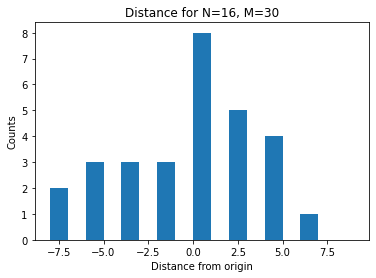

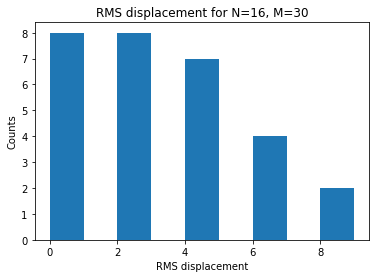

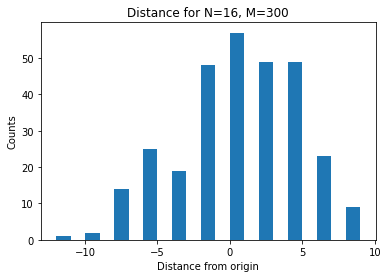

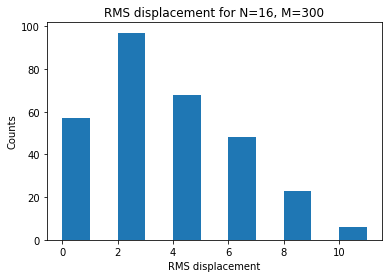

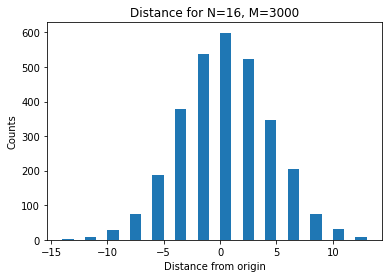

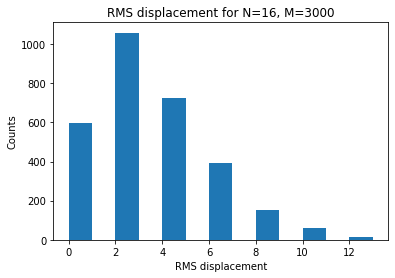

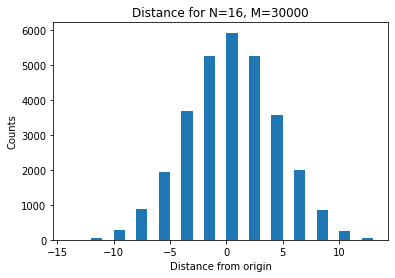

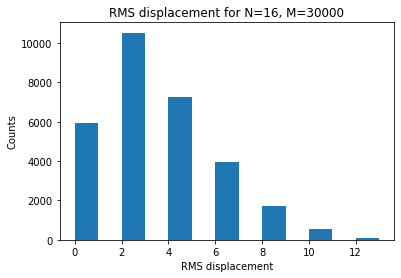

In [23]:
samp1 = take_walk(M=30, N=16, P=0.5)
samp2 = take_walk(M=300, N=16, P=0.5)
samp3 = take_walk(M=3000, N=16, P=0.5)
samp4 = take_walk(M=30000, N=16, P=0.5)

**B. Describe the qualitative changes of the histogram for increasing values of N.**

The mean of the value stays at 0, but the variance of the histogram increases for increasing value of N. (The histogram becomes wider and shorter)

Mean of M=5000, N=10: 0.0456
Std of M=5000, N=10: 3.1821251766704592
Mean of RMS: 2.4712
Std of RMS: 2.005285655461585
-----------------------------------
Mean of M=5000, N=50: 0.1124
Std of M=5000, N=50: 7.040864026524018
Mean of RMS: 5.582
Std of RMS: 4.29274690611967
-----------------------------------
Mean of M=5000, N=100: 0.2124
Std of M=5000, N=100: 10.102063464461109
Mean of RMS: 8.05
Std of RMS: 6.10690592689948
-----------------------------------
Mean of M=5000, N=1000: 0.0772
Std of M=5000, N=1000: 30.887376712178067
Mean of RMS: 24.7036
Std of RMS: 18.540985600555327
-----------------------------------


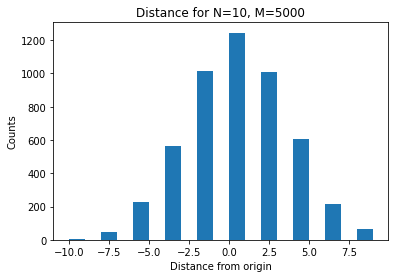

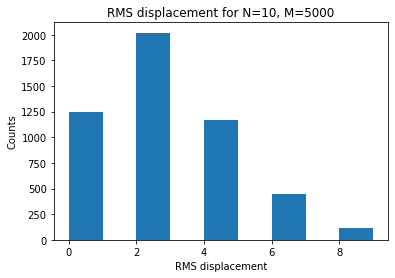

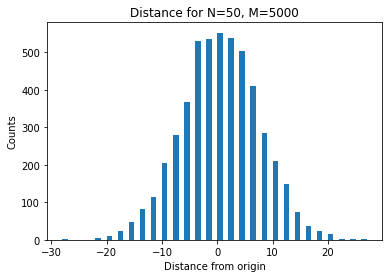

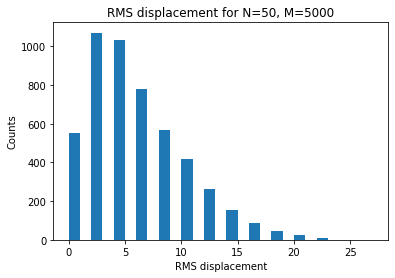

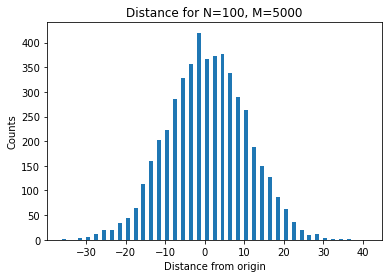

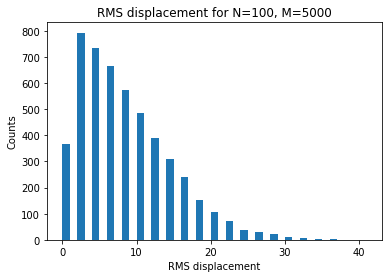

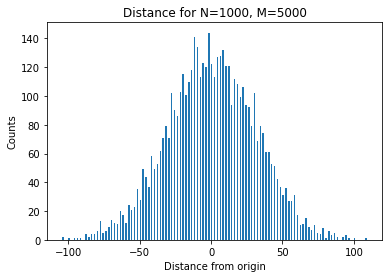

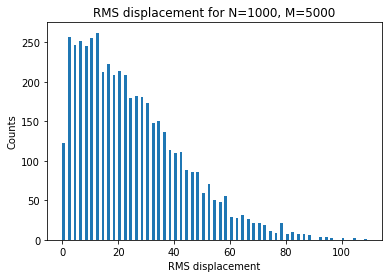

In [24]:
samp1 = np.array(take_walk(M=5000, N=10, P=0.5))
samp2 = np.array(take_walk(M=5000, N=50, P=0.5))
samp3 = np.array(take_walk(M=5000, N=100, P=0.5))
samp4 = np.array(take_walk(M=5000, N=1000, P=0.5))

**C. For N = 16 and N=100, calculate the expected mean and standard deviation for both the displacement and root-mean-square displacement using the Gaussian formulas derived in class for large N.**

The expected mean of both N=16 and N=100 should be 0, because each step has a expected change of 0 (the probability of stepping forward and backward are same). 

The standard deviation is equal to the square root of number of step. For N=16, the standard deviation is $\sqrt{16}=4$. For N=100, the standard deviation is $\sqrt{100}=10$.

**D. Run a simulation for N = 16 and 100 for a few different values of M.  How do your results in C compare to the simulation?  Do your measured means always lie within the predicted error bars?  About how large does M need to be for this to be true?**

My results have some fluctuations above or below the results in C. The measured results are not always lie within the predicted error bars, such as the run of M=2, N=100, P=0.5. About $M=5$, the result is very unlikely to be out of the error bar. About $M=10$ the results always lie within the predicted error bars (statistically)

Mean of M=2, N=16: -3.0
Std of M=2, N=16: 1.0
Mean of RMS: 3.0
Std of RMS: 1.0
-----------------------------------
Mean of M=2, N=100: -14.0
Std of M=2, N=100: 10.0
Mean of RMS: 14.0
Std of RMS: 10.0
-----------------------------------
Mean of M=5, N=16: 0.4
Std of M=5, N=16: 2.3323807579381204
Mean of RMS: 2.0
Std of RMS: 1.2649110640673518
-----------------------------------
Mean of M=5, N=100: 4.8
Std of M=5, N=100: 8.44748483277715
Mean of RMS: 8.8
Std of RMS: 4.1182520563948
-----------------------------------
Mean of M=50, N=16: 0.16
Std of M=50, N=16: 4.05640234690791
Mean of RMS: 3.2
Std of RMS: 2.4979991993593593
-----------------------------------
Mean of M=50, N=100: 0.52
Std of M=50, N=100: 9.215725690362099
Mean of RMS: 7.88
Std of RMS: 4.806828476240858
-----------------------------------
Mean of M=500, N=16: -0.348
Std of M=500, N=16: 3.9616784321799767
Mean of RMS: 3.148
Std of RMS: 2.430246078075222
-----------------------------------
Mean of M=500, N=100: -0.316
Std o

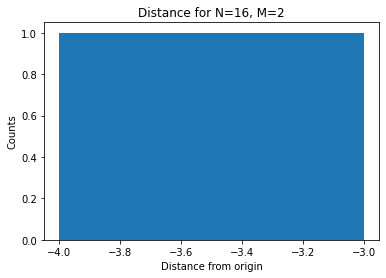

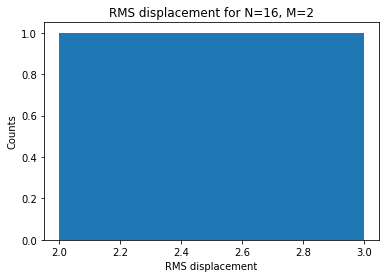

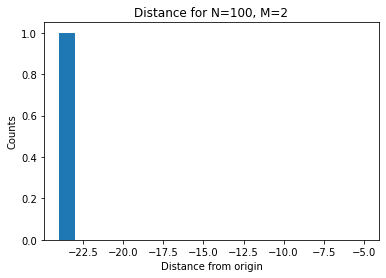

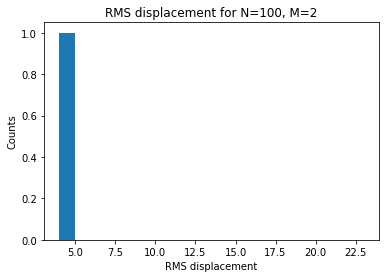

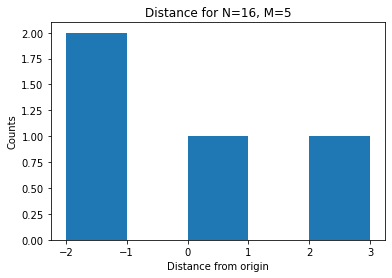

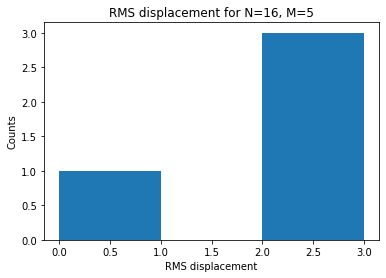

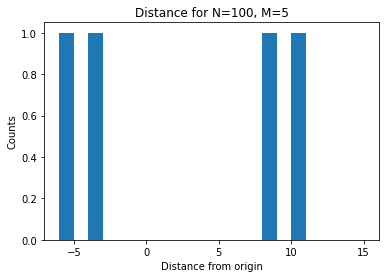

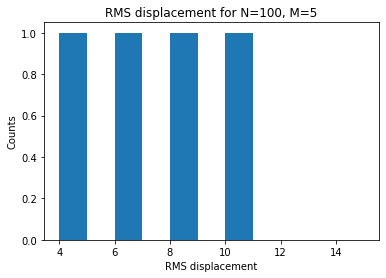

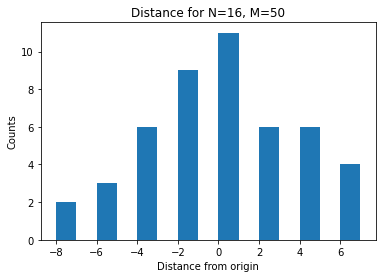

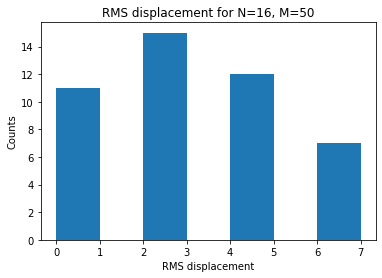

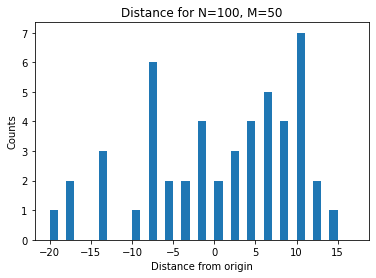

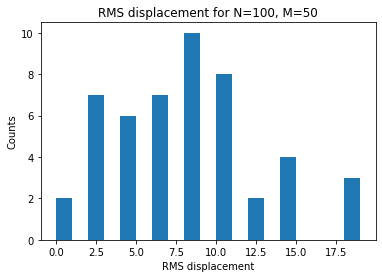

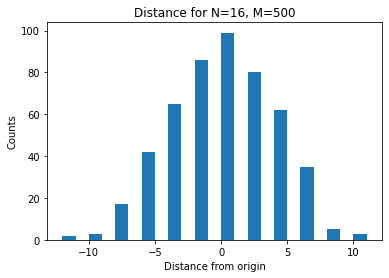

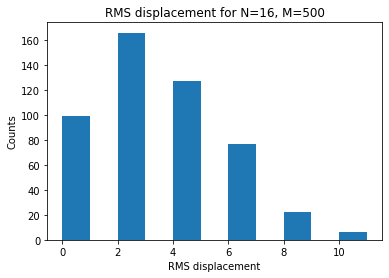

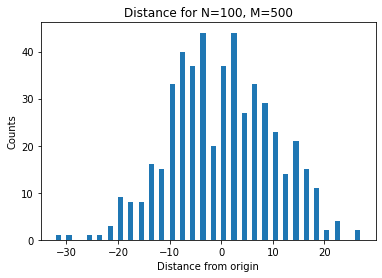

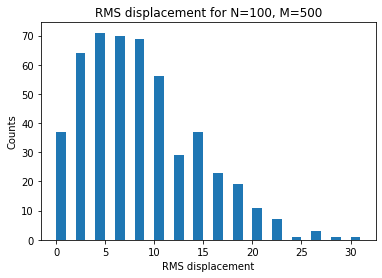

In [54]:
np.array(take_walk(M=2, N=16, P=0.5))
np.array(take_walk(M=2, N=100, P=0.5))
np.array(take_walk(M=5, N=16, P=0.5))
np.array(take_walk(M=5, N=100, P=0.5))
np.array(take_walk(M=50, N=16, P=0.5))
np.array(take_walk(M=50, N=100, P=0.5))
np.array(take_walk(M=500, N=16, P=0.5))
np.array(take_walk(M=500, N=100, P=0.5));

**E. Change the probability to P=0.8. Describe the changes to the histogram for N=16. Compare the most probable value of  to the mean and rms displacement.**

Simulation:
After changing the probability to 0.8, the most probable value of the distribution is shifted to the right, and it has a negative skew. The RMS displacement is greater, because now steps are more likely to the positive direction.

Calculation:
The expected change of each step is $\sum \text{value}* P(\text{value}) = (+1)*0.8 + (-1)*0.2 = 0.6$. For $N=16$, the most probable value is $16*0.6=9.6$.

The mean squared value is $<x>=(<a_1^2>+<a_2^2>+<a_3^2>+\dots + <a_n^2>) + (<a_1 a_2> + <a_1 a_3>+\dots+<a_1 a_n>) + \dots$. For each step, $a=\pm 1$ so $a^2=1$. The terms in first parentheses are equal to $N$. 

$a_i a_j = 1$ when $a_i$ and $a_j$ have same signs. When the signs are both $+$, the probability is $0.8*0.8=0.64$ and both $-$ would be $0.2*0.2=0.04$. Therefore, $a_i a_j$ has 0.68 probability to be 1 and 0.32 probability to be -1. The expected value of $<a_i a_j>$ is $0.68 - 0.32 = 0.36$. So the terms in the second parentheses is $0.36(N-1)$. And there are $N$ numbers of second parentheses, so the total mean squared value is $N + [0.36(N-1)]N$. So RMS is $\sqrt{0.64N+0.36N^2}$.

For $N=16$, RMS is 10.12

Mean of M=5000, N=16: -0.0252
Std of M=5000, N=16: 3.955978382145181
Mean of RMS: 3.1284
Std of RMS: 2.421469272982831
-----------------------------------
Mean of M=5000, N=16: 9.5444
Std of M=5000, N=16: 3.2051877698506215
Mean of RMS: 9.5532
Std of RMS: 3.178862966533789
-----------------------------------


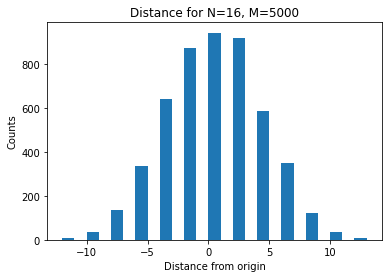

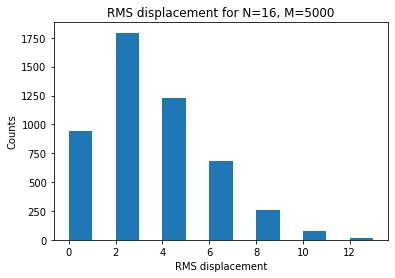

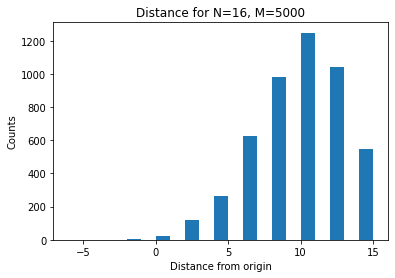

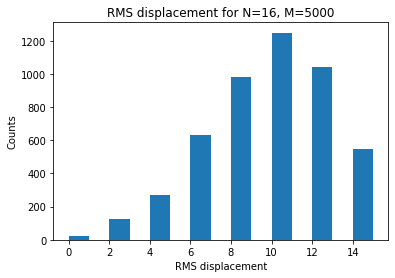

In [27]:
samp1 = np.array(take_walk(M=5000, N=16, P=0.5))
samp2 = np.array(take_walk(M=5000, N=16, P=0.8))